In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [157]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [158]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [159]:
y = df.Survived
X = df.drop(['Survived'], axis=1)

In [160]:
X.shape, y.shape

((891, 3), (891,))

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [162]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [163]:
mean_age = X_train["Age"].mean()
mean_fare = X_train["Fare"].mean()

median_age = X_train["Age"].median()
median_fare = X_train["Fare"].median()

print(f"Mean of Age: {mean_age}")
print(f"Median of Age: {median_age}")

print(f"Mean of Fare: {mean_fare}")
print(f"Median of Fare: {median_fare}")

Mean of Age: 29.66854419410745
Median of Age: 28.0
Mean of Fare: 32.86002144970414
Median of Fare: 14.4542


In [164]:
X_train["mean_age"] = X_train['Age'].fillna(mean_age)
X_train["median_age"] = X_train['Age'].fillna(median_age)

X_train["mean_fare"] = X_train['Fare'].fillna(mean_fare)
X_train["median_fare"] = X_train['Fare'].fillna(median_fare)

In [165]:
X_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
57,28.5,7.2292,0,28.500000,28.5,7.229200,7.2292
717,27.0,10.5000,0,27.000000,27.0,10.500000,10.5000
431,NaN,16.1000,1,29.668544,28.0,16.100000,16.1000
633,NaN,NaN,0,29.668544,28.0,32.860021,14.4542
163,17.0,8.6625,0,17.000000,17.0,8.662500,8.6625
...,...,...,...,...,...,...,...
369,24.0,69.3000,0,24.000000,24.0,69.300000,69.3000
320,22.0,7.2500,0,22.000000,22.0,7.250000,7.2500
527,NaN,221.7792,0,29.668544,28.0,221.779200,221.7792
125,12.0,11.2417,1,12.000000,12.0,11.241700,11.2417


<h5>The first thing to do after filling missing values is to check the variance of the dist. Often, filling in with mean and median shrinks the variance as more values will be closer to mean/median after filling.</h5>

In [167]:
print("Original variance of Age", X_train["Age"].var())
print("Variance of Age after imputation with mean", X_train['mean_age'].var())
print("Variance of Age after imputation with median", X_train['median_age'].var())
print("-----------------------------------------------")
print("Original variance of Fare", X_train["Fare"].var())
print("Variance of Fare after imputation with mean", X_train['mean_fare'].var())
print("Variance of Fare after imputation with median", X_train['median_fare'].var())

Original variance of Age 208.16317218250535
Variance of Age after imputation with mean 168.63851923645996
Variance of Age after imputation with median 169.06690538073508
-----------------------------------------------
Original variance of Fare 2730.009961366482
Variance of Fare after imputation with mean 2591.7816088922295
Variance of Fare after imputation with median 2608.067443193843


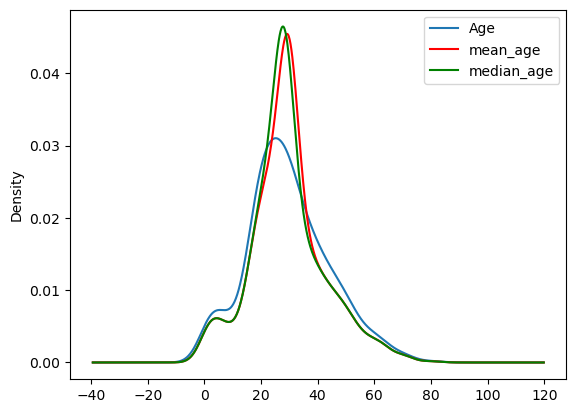

In [168]:
# compare the distributions of a variable Age with its imputed versions, using kernel density estimation (KDE) plots
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train['mean_age'].plot(kind='kde', ax=ax, color='red')
X_train['median_age'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [169]:
# Check the covariance of each column in X_train
X_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,208.163172,90.474153,-5.941745,208.163172,208.163172,85.449859,84.208261
Fare,90.474153,2730.009961,17.217908,72.917213,76.018931,2730.009961,2730.009961
Family,-5.941745,17.217908,2.837337,-4.813566,-4.789323,16.346115,16.331135
mean_age,208.163172,72.917213,-4.813566,168.638519,168.638519,69.225202,68.219351
median_age,208.163172,76.018931,-4.789323,168.638519,169.066905,72.169871,71.085154
mean_fare,85.449859,2730.009961,16.346115,69.225202,72.169871,2591.781609,2591.781609
median_fare,84.208261,2730.009961,16.331135,68.219351,71.085154,2591.781609,2608.067443


Covariance is a statistical measure that describes the degree to which two variables change together. If higher values of one variable correspond to higher (or lower) values of another variable, their covariance can help identify the direction and strength of their relationship.

In [171]:
# check the correlation
X_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.112243,-0.272940,1.000000,1.000000,0.109654,0.107663
Fare,0.112243,1.000000,0.193313,0.106983,0.111404,1.000000,1.000000
Family,-0.272940,0.193313,1.000000,-0.220056,-0.218670,0.190616,0.189846
mean_age,1.000000,0.106983,-0.220056,1.000000,0.998732,0.104710,0.102866
median_age,1.000000,0.111404,-0.218670,0.998732,1.000000,0.109025,0.107051
mean_fare,0.109654,1.000000,0.190616,0.104710,0.109025,1.000000,0.996873
median_fare,0.107663,1.000000,0.189846,0.102866,0.107051,0.996873,1.000000


Correlation checks are used to measure and analyze the strength and direction of the relationship between two variables. Unlike covariance, correlation provides a normalized measure that is easier to interpret because it is bounded between -1 and 1.

<h5 style='color: green'>Covariance tells you only the strenght of the relationship, while correlation provides both direction and strength
Cov(X, Y) > 0, means both variables tend to increase together</h5>

<Axes: >

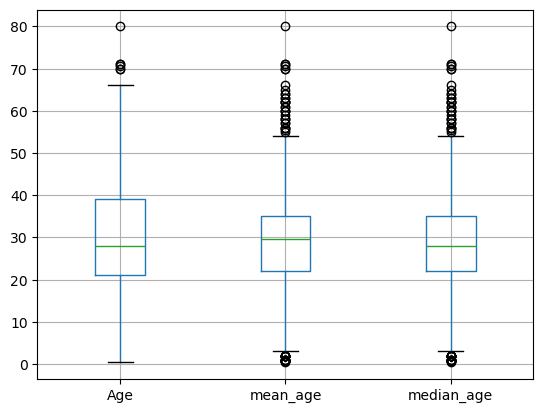

In [174]:
X_train[['Age', 'mean_age', 'median_age']].boxplot()   # boxplot expects a list to be passed as a parameter

<Axes: >

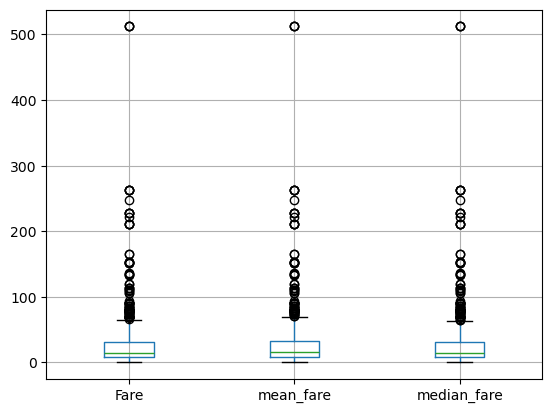

In [175]:
X_train[['Fare', 'mean_fare', 'median_fare']].boxplot()

<h5>Filling in the missing values sklearn's SimpleImputer</h5>

In [177]:
X_train

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
57,28.5,7.2292,0,28.500000,28.5,7.229200,7.2292
717,27.0,10.5000,0,27.000000,27.0,10.500000,10.5000
431,NaN,16.1000,1,29.668544,28.0,16.100000,16.1000
633,NaN,NaN,0,29.668544,28.0,32.860021,14.4542
163,17.0,8.6625,0,17.000000,17.0,8.662500,8.6625
...,...,...,...,...,...,...,...
369,24.0,69.3000,0,24.000000,24.0,69.300000,69.3000
320,22.0,7.2500,0,22.000000,22.0,7.250000,7.2500
527,NaN,221.7792,0,29.668544,28.0,221.779200,221.7792
125,12.0,11.2417,1,12.000000,12.0,11.241700,11.2417


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [179]:
imputer1 = SimpleImputer()
imputer2 = SimpleImputer(strategy='median')

In [180]:
trf = ColumnTransformer(transformers=[
    ('age_trans', imputer1, [0]),
    ('fare_trans', imputer2, [1])
], remainder='passthrough')

In [181]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('age_trans', SimpleImputer(), [0]),
                                ('fare_trans', SimpleImputer(strategy='median'),
                                 [1])])

In [182]:
trf.named_transformers_['age_trans'].statistics_ # shows the mean value

array([29.78590426])

In [183]:
trf.named_transformers_['fare_trans'].statistics_ # shows the median value

array([14.4583])

In [212]:
X_train_transformed = pd.DataFrame(trf.transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(trf.transform(X_test), columns=X_test.columns)

In [214]:
X_train_transformed

,Age,Fare,Family
0,40.000000,27.7208,0.0
1,4.000000,16.7000,2.0
2,47.000000,9.0000,0.0
3,9.000000,31.3875,6.0
4,20.000000,9.8458,0.0
...,...,...,...
707,30.000000,8.6625,0.0
708,29.785904,8.7125,0.0
709,71.000000,49.5042,0.0
710,29.785904,221.7792,0.0


In [222]:
X_train.describe()

,Age,Fare,Family
count,564.000000,676.000000,712.000000
mean,29.785904,32.617597,0.932584
std,14.295087,49.479268,1.653860
min,0.420000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,28.750000,14.458300,0.000000
75%,38.250000,31.275000,1.000000
max,71.000000,512.329200,10.000000


In [224]:
X_train_transformed.describe()

,Age,Fare,Family
count,712.000000,712.000000,712.000000
mean,29.785904,31.699430,0.932584
std,12.720559,48.374487,1.653860
min,0.420000,0.000000,0.000000
25%,23.000000,7.925000,0.000000
50%,29.785904,14.458300,0.000000
75%,35.000000,30.500000,1.000000
max,71.000000,512.329200,10.000000
